In [45]:
mode = "png"

import matplotlib

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

import matplotlib
from matplotlib import pyplot as plt

In [46]:
import numpy as np

def block_mtx_psd(B):
    """
    A function which indicates whether a matrix
    B is positive semi-definite.
    """
    return np.all(np.linalg.eigvals(B) >= 0)

In [47]:
import numpy as np
from graphbook_code import heatmap

B = np.array([[0.6, 0.2], 
              [0.2, 0.4]])
block_mtx_psd(B)
# True

True

<AxesSubplot:title={'center':'(A) Homophilic'}, xlabel='Community', ylabel='Community'>

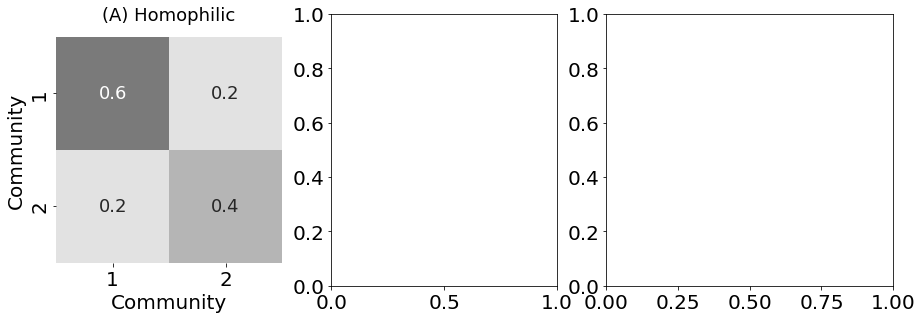

In [48]:
psdfig, psdaxs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={"width_ratios": [1,1,1.27]})
heatmap(B, title="(A) Homophilic", ax=psdaxs[0],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=False, annot=True)

In [49]:
B_indef = np.array([[.1, .2], 
                    [.2, .1]])
block_mtx_psd(B_indef)
# False

False

<AxesSubplot:title={'center':'(A) Indefinite planted partition'}, xlabel='Community', ylabel='Community'>

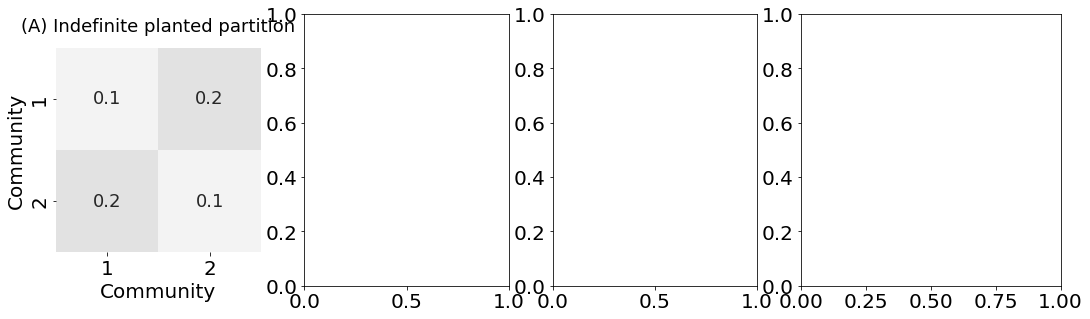

In [50]:
indeffig, indefaxs = plt.subplots(1, 4, figsize=(18, 5), gridspec_kw={"width_ratios": [1,1,1,1.27]})
heatmap(B_indef, title="(A) Indefinite planted partition", ax=indefaxs[0],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=False, annot=True)

In [51]:
# a positive semi-definite kidney-egg block matrix
B_psd = np.array([[.6, .2], 
                  [.2, .2]])
block_mtx_psd(B_psd)
# True

True

In [52]:
heatmap(B_psd, title="(B) PSD Kidney-Egg", ax=psdaxs[1],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=False, annot=True)

<AxesSubplot:title={'center':'(B) PSD Kidney-Egg'}, xlabel='Community', ylabel='Community'>

In [53]:
# an indefinite kidney-egg block matrix
B_indef = np.array([[.1, .2], 
                    [.2, .2]])
block_mtx_psd(B_indef)
#False

False

In [54]:
heatmap(B_indef, title="(B) Indefinite Kidney-Egg", ax=indefaxs[1],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=False, annot=True)

<AxesSubplot:title={'center':'(B) Indefinite Kidney-Egg'}, xlabel='Community', ylabel='Community'>

In [55]:
# a positive semi-definite core-periphery block matrix
B_psd = np.array([[.6, .2], 
                  [.2, .1]])
block_mtx_psd(B_psd)
# True

True

In [56]:
heatmap(B_psd, title="(C) PSD Core-Periphery", ax=psdaxs[2],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=True, annot=True, legend_title="Block Probability")

<AxesSubplot:title={'center':'(C) PSD Core-Periphery'}, xlabel='Community', ylabel='Community'>

In [57]:
# an indefinite core-periphery block matrix
B_indef = np.array([[.6, .2], 
                    [.2, .05]])
block_mtx_psd(B_indef)
# False

False

In [58]:
heatmap(B_indef, title="(C) Indefinite Core-Periphery", ax=indefaxs[2],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=False, annot=True)

<AxesSubplot:title={'center':'(C) Indefinite Core-Periphery'}, xlabel='Community', ylabel='Community'>

In [59]:
# an indefinite disassortative block matrix
B = np.array([[.1, .5], 
              [.5, .2]])
block_mtx_psd(B)
# False

False

In [60]:
heatmap(B, title="(D) Disassortative", ax=indefaxs[3],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=True, annot=True, legend_title="Block Probability")

<AxesSubplot:title={'center':'(D) Disassortative'}, xlabel='Community', ylabel='Community'>

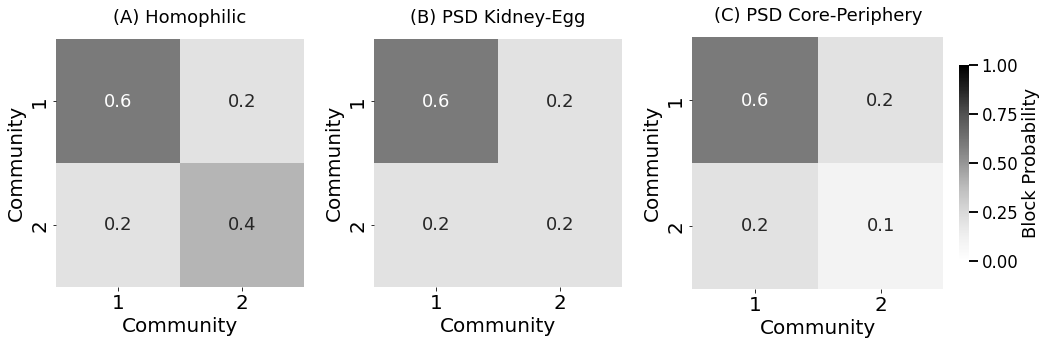

In [61]:
psdfig.tight_layout()
psdfig.savefig("Figures/psd.{}".format(mode))
psdfig

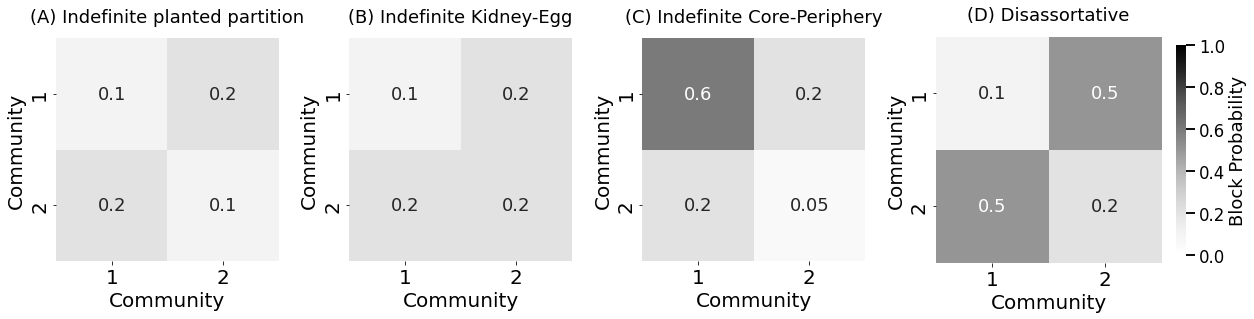

In [62]:
indeffig.tight_layout()
indeffig.savefig("Figures/indef.{}".format(mode))
indeffig

In [63]:
# homophilic, and hence positive semi-definite, block matrix
B = np.array([[0.6, 0.2], 
              [0.2, 0.4]])

# generate square root matrix
sqrtB = np.linalg.cholesky(B)

# verify that the process worked through by equality element-wise
# use allclose instead of array_equal because of tiny
# numerical precision errors
np.allclose(sqrtB @ sqrtB.T, B)
# True

True

In [72]:
from graphbook_code import ohe_comm_vec

def lpm_from_sbm(z, B):
    """
    A function to produce a latent position matrix from a
    community assignment vector and a block matrix.
    """
    if not block_mtx_psd(B):
        raise ValueError("Latent position matrices require PSD block matrices!")
    # one-hot encode the community assignment vector
    C = ohe_comm_vec(z)
    # compute square root matrix
    sqrtB = np.linalg.cholesky(B)
    # X = C*sqrt(B)
    return C @ sqrtB

# make a community assignment vector for 25 nodes / community
nk = 25
z = np.repeat([1, 2], nk)

# latent position matrix for an equivalent RDPG
X = lpm_from_sbm(z, B)

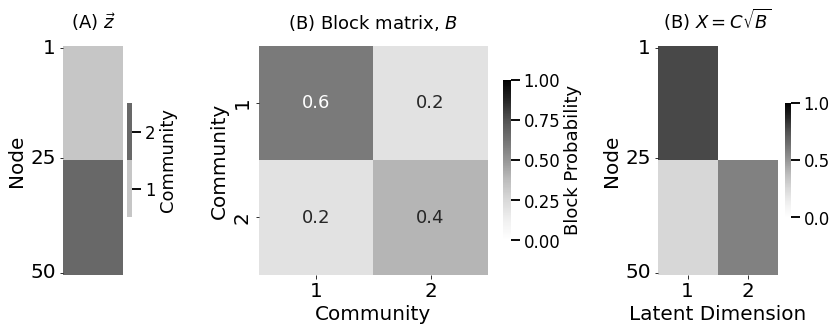

In [84]:
from graphbook_code import plot_vector, lpm_heatmap
fig, axs = plt.subplots(1,3, figsize=(12, 5), gridspec_kw={"width_ratios": [.5,2,1]})

plot_vector(z.astype(int), title="(A) $\\vec z$", legend_title="Community", 
            ticks=[0.5, 24.5, 49.5], ticklabels=[1, 25, 50],
            ticktitle="Node", ax=axs[0])
heatmap(B, title="(B) Block matrix, $B$", ax=axs[1],
        xtitle="Community", ytitle="Community",
        xticks=[0.5, 1.5], yticks=[0.5, 1.5],
        xticklabels=[1, 2], yticklabels=[1, 2], vmin=0, vmax=1,
        cbar=True, annot=True, legend_title="Block Probability")
lpm_heatmap(X, title="(B) $X = C\\sqrt{B}$", ax=axs[2],
            xtitle="Latent Dimension", ytitle="Node", 
            yticks=[0.5, 24.5, 49.5], yticklabels=[1, 25, 50],
            xticks=[0.5, 1.5], xticklabels=[1, 2], vmin=0, vmax=1,
            cbar=True)

fig.tight_layout()
fig.savefig("Figures/lpm.{}".format(mode))

In [82]:
from graphbook_code import generate_sbm_pmtx

# generate the probability matrices for an RDPG using X and SBM
P_rdpg = X @ X.T
P_sbm = generate_sbm_pmtx(z, B)

# verify equality element-wise
np.allclose(P_rdpg, P_sbm)
# True

True